In [34]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

In [35]:
# Converts csv file into np matrix
def csvToMatrix(fname):
    with open(fname, 'r') as f:
        data = list(csv.reader(f))
    return np.array(data).astype(float)

In [36]:
class TrainingData:

    def __init__(self, train, trainR):
        self.train   = csvToMatrix(train)
        self.trainR  = csvToMatrix(trainR)
        self.weights = self.pseudoInv(150) 

    def pseudoInv(self, x):
        innerProduct = np.matmul(self.train.T, self.train)
        mvProduct    = np.matmul(self.train.T, self.trainR)
        pseudoInv = []
        for y in range(0, x):
            x = y * np.eye(self.train.shape[1]) + innerProduct
            pseudoInv.append(np.matmul(np.linalg.inv(x), mvProduct))
        return pseudoInv

    def calc_mse(self, data, dataR):
        data = csvToMatrix(data)
        dataR = csvToMatrix(dataR)
        mse = []
        for w in self.weights:
            sum_sq = 0
            for i in range(0, len(data)):
                sum_sq += (float) (np.matmul(data[i], w) - dataR[i])**2
            mse.append(sum_sq/len(data))
        return mse

In [37]:
data = []

td = TrainingData('data/train-1000-100.csv','data/trainR-1000-100.csv')
data.append(
  [td.calc_mse('data/test-1000-100.csv','data/testR-1000-100.csv'),
   td.calc_mse('data/train-1000-100.csv','data/trainR-1000-100.csv')])

td = TrainingData('data/train-100-100.csv', 'data/trainR-100-100.csv')
data.append(
  [td.calc_mse('data/test-100-100.csv','data/testR-100-100.csv'),
   td.calc_mse('data/train-100-100.csv','data/trainR-100-100.csv')])

td = TrainingData('data/train-100-10.csv', 'data/trainR-100-10.csv')
data.append(
  [td.calc_mse('data/test-100-10.csv','data/testR-100-10.csv'),
   td.calc_mse('data/train-100-10.csv','data/trainR-100-10.csv')])

td = TrainingData('data/train-crime.csv', 'data/trainR-crime.csv')
data.append(
  [td.calc_mse('data/test-crime.csv','data/testR-crime.csv'),
   td.calc_mse('data/train-crime.csv','data/trainR-crime.csv')])

td = TrainingData('data/train-wine.csv', 'data/trainR-wine.csv')
data.append(
  [td.calc_mse('data/test-wine.csv','data/testR-wine.csv'),
   td.calc_mse('data/train-wine.csv','data/trainR-wine.csv')])

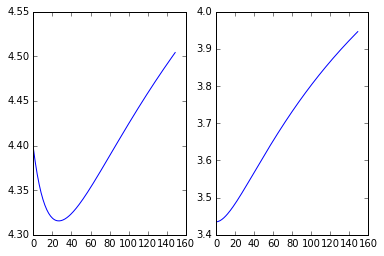

In [59]:
td = TrainingData('data/train-1000-100.csv','data/trainR-1000-100.csv')
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(td.calc_mse('data/test-1000-100.csv','data/testR-1000-100.csv'))
axes[1].plot(td.calc_mse('data/train-1000-100.csv','data/trainR-1000-100.csv'))
show()
